## Titanic - Machine Learning from Disaster

### Competition

### Data Set

(1) train.csv¶

train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). To investigate this data, click on the name of the file on the left of the screen. Once you've done this, you can view all of the data in the window.

The values in the second column ("Survived") can be used to determine whether each passenger survived or not:

if it's a "1", the passenger survived.

if it's a "0", the passenger died.

For instance, the first passenger listed in train.csv is Mr. Owen Harris Braund. He was 22 years old when he died on the Titanic.

(2) test.csv

Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived.

Click on test.csv (on the left of the screen) to examine its contents. Note that test.csv does not have a "Survived" column - this information is hidden from you, and how well you do at predicting these hidden values will determine how highly you score in the competition!

(3) gender_submission.csv

The gender_submission.csv file is provided as an example that shows how you should structure your predictions. It predicts that all female passengers survived, and all male passengers died. Your hypotheses regarding survival will probably be different, which will lead to a different submission file. But, just like this file, your submission should have:

a "PassengerId" column containing the IDs of each passenger from test.csv.

a "Survived" column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

In [2]:
train_data = pd.read_csv("titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    string 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  889 non-null    object 
 9   Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(3), string(1)
memory usage: 69.7+ KB


In [25]:
train_data['Sex'] = train_data['Sex'].astype('string')

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    string 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  889 non-null    object 
 9   Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(3), string(1)
memory usage: 69.7+ KB


- survival  |	Survival    |	0 = No, 1 = Yes
- pclass    |	Ticket Class    |	1 = 1st, 2 = 2nd, 3 = 3rd
- sex   |	Sex	
- Age   |	Age in Years	
- sibsp |	# of siblings / spouses aboard the Titanic	
- parch |	# of parents / children aboard the Titanic	
- ticket    |	Ticket Number	
- fare  |	Passenger Fare	
- cabin |	Cabin Number	
- embarked  |	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [27]:
# Duplicate rows
duplicate_rows_df = train_data[train_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (113, 10)


In [28]:
train_data.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Cabin       891
Embarked    889
Deck        891
dtype: int64

In [29]:
# Check the count of missing values per variable
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
Deck        0
dtype: int64

In [30]:
# Check the percentage of missing values per variable
train_data.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.000000
Embarked    0.002245
Deck        0.000000
dtype: float64

Text(0.5, 0, 'Age')

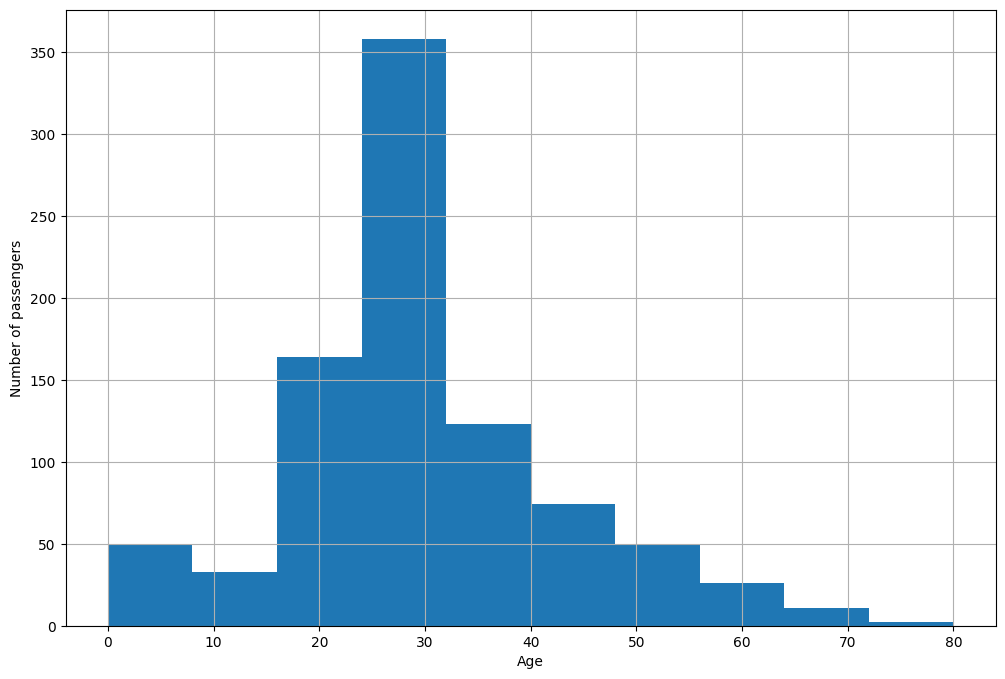

In [31]:
# Age is a continuous variable
# First, we will check the distribution of age variable

# Plot the distribution of age to find out if they are Gaussian or skewed

plt.figure(figsize=(12,8))
fig = train_data.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

In [32]:
# We can see that the Age distribution is skewed 
# So, we will use the median imputation

# Calculate median of Age
median = train_data.Age.median()
median

np.float64(28.0)

In [33]:
# Impute missing values in Age

train_data['Age'].fillna(median, inplace=True)

/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_4994/674662391.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(median, inplace=True)


In [34]:
train_data['Age'] = train_data['Age'].astype('int64')

In [35]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0,3,male,22,1,0,7.2500,NA,S,N
1,1,1,female,38,1,0,71.2833,C85,C,C
2,1,3,female,26,0,0,7.9250,NA,S,N
3,1,1,female,35,1,0,53.1000,C123,S,C
4,0,3,male,35,0,0,8.0500,NA,S,N


In [36]:
# Cabin is a categorial variable

train_data['Cabin'].unique()

array(['NA', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

In [37]:
train_data['Cabin'].value_counts()

Cabin
NA             687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

In [38]:
train_data['Cabin'].fillna("NA", inplace=True)

/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_4994/2140952843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna("NA", inplace=True)


In [39]:
train_data['Deck'] = train_data['Cabin'].str.slice(0, 1)

In [40]:
train_data['Deck'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [41]:
train_data['Deck'].value_counts()

Deck
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [43]:
train_data = train_data.drop(['Cabin'], axis=1)

In [44]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22,1,0,7.2500,S,N
1,1,1,female,38,1,0,71.2833,C,C
2,1,3,female,26,0,0,7.9250,S,N
3,1,1,female,35,1,0,53.1000,S,C
4,0,3,male,35,0,0,8.0500,S,N


In [45]:
# Cabin is a categorial variable

train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [46]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [47]:
# Impute missing values in Embarked

train_data['Embarked'].fillna("S", inplace=True)

/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_4994/3830415095.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna("S", inplace=True)


In [48]:
# Check the count of missing values per variable
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64